# Traffic Sign Classification
Traffic Sign Classification is an essential part of Autonomous Vehicles so that it can understand the traffic signs properly and take actions accordingly.

## Import Dataset

In [1]:
# This will load the dataset.You will see a folder called ALL in your workspace.
!wget -N "https://cainvas-static.s3.amazonaws.com/media/user_data/arya.ashish/traffic.zip"
!unzip -qo traffic.zip 
!rm traffic.zip

--2020-12-10 07:04:36--  https://cainvas-static.s3.amazonaws.com/media/user_data/arya.ashish/traffic.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.66.64
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.66.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1831604 (1.7M) [application/x-zip-compressed]
Saving to: ‘traffic.zip’

traffic.zip         100%[===================>]   1.75M  --.-KB/s    in 0.04s   

2020-12-10 07:04:36 (47.1 MB/s) - ‘traffic.zip’ saved [1831604/1831604]



## Importing Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

import cv2
from tensorflow.keras.utils import plot_model
from keras.layers import Dense, Flatten, AveragePooling2D, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

## Reading Data of Class Labels

In [5]:
path = 'traffic'
lab = pd.read_csv('traffic/labels.csv')

In [6]:
d = dict()
class_labels = dict()
for dirs in os.listdir(path + '/myData'):
    count = len(os.listdir(path+'/myData/'+dirs))
    d[dirs+' => '+lab[lab.ClassId == int(dirs)].values[0][1]] = count
    class_labels[int(dirs)] = lab[lab.ClassId == int(dirs)].values[0][1]

## Reading Image Data

In [9]:
# input image dimensions
img_rows, img_cols = 224, 224
# The images are RGB.
img_channels = 3
nb_classes = len(class_labels.keys())

datagen = ImageDataGenerator()
data = datagen.flow_from_directory('traffic/myData',
                                    target_size=(224, 224),
                                    batch_size=2000,
                                    class_mode='categorical',
                                    shuffle=True )

Found 2000 images belonging to 20 classes.


In [10]:
X , y = data.next()

In [11]:
# Labels are one hot encoded
print(f"Data Shape   :{X.shape}\nLabels shape :{y.shape}")

Data Shape   :(2000, 224, 224, 3)
Labels shape :(2000, 20)


## Sample Images of Dataset

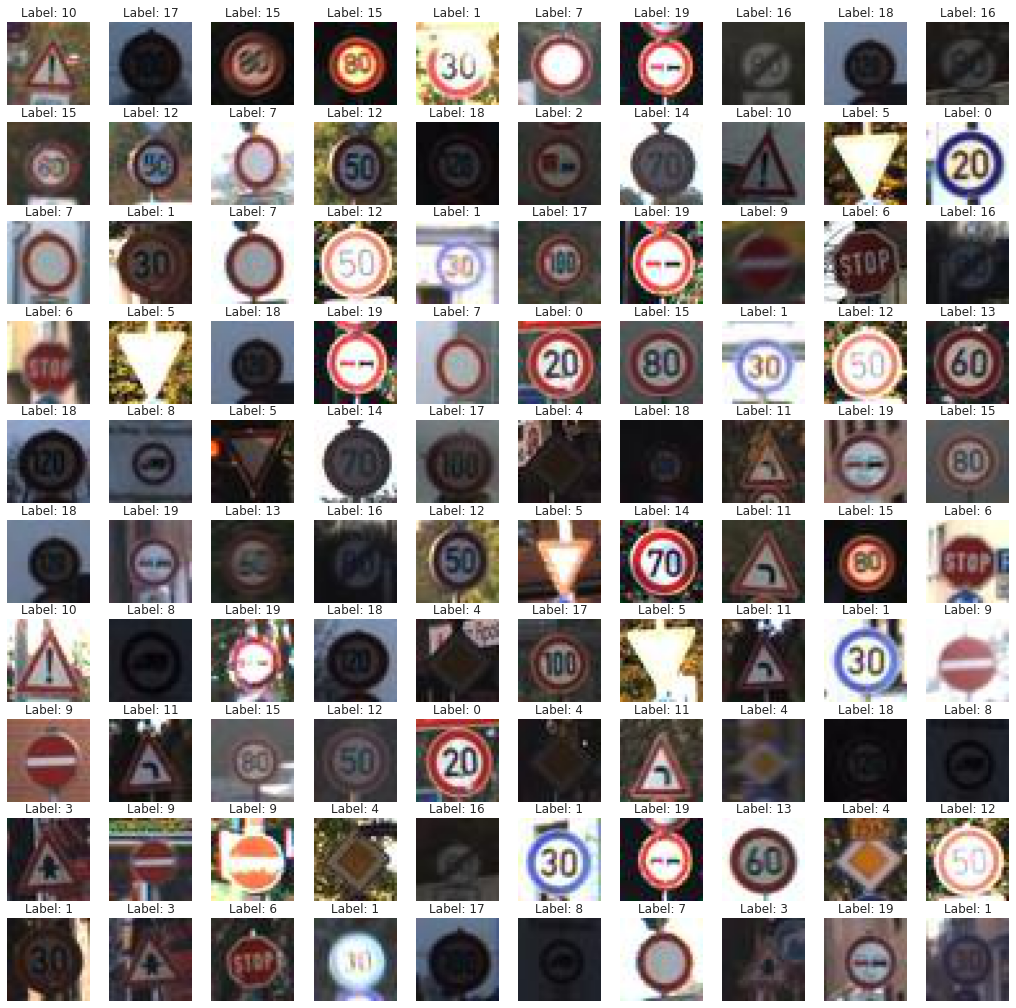

In [12]:
fig, axes = plt.subplots(10,10, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X.shape[0])
    ax.imshow(X[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Label: '+str(np.argmax(y[r])))
    


## Test-Train Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=11)

In [14]:
print("Train Shape: {}\nTest Shape : {}".format(X_train.shape, X_test.shape))

Train Shape: (1800, 224, 224, 3)
Test Shape : (200, 224, 224, 3)


## Model Archutecture

In [20]:
# Model creation with changes

model = VGG16(input_shape=(224,224,3),include_top=False)

for layer in model.layers:
    layer.trainable = False

newModel = model.output
newModel = AveragePooling2D()(newModel)
newModel = Flatten()(newModel)
newModel = Dense(128, activation="relu")(newModel)
newModel = Dropout(0.5)(newModel)
newModel = Dense(20, activation='softmax')(newModel)

model = Model(inputs=model.input, outputs=newModel)

In [21]:
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

## Compiling the Model

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Model Training

In [23]:
n_epochs = 10
history =  model.fit(X_train, y_train,  batch_size = 32, epochs = n_epochs, verbose = 1, 
              validation_data = (X_test, y_test))

Epoch 1/10
57/57 [==============================] - 7s 127ms/step - loss: 3.0300 - accuracy: 0.3133 - val_loss: 1.1730 - val_accuracy: 0.7200
Epoch 2/10
57/57 [==============================] - 7s 125ms/step - loss: 1.3648 - accuracy: 0.5828 - val_loss: 0.4938 - val_accuracy: 0.9050
Epoch 3/10
57/57 [==============================] - 7s 126ms/step - loss: 0.8274 - accuracy: 0.7267 - val_loss: 0.3096 - val_accuracy: 0.9350
Epoch 4/10
57/57 [==============================] - 7s 127ms/step - loss: 0.6671 - accuracy: 0.8033 - val_loss: 0.2033 - val_accuracy: 0.9650
Epoch 5/10
57/57 [==============================] - 7s 129ms/step - loss: 0.5130 - accuracy: 0.8372 - val_loss: 0.1131 - val_accuracy: 0.9900
Epoch 6/10
57/57 [==============================] - 7s 130ms/step - loss: 0.3852 - accuracy: 0.8772 - val_loss: 0.0990 - val_accuracy: 0.9900
Epoch 7/10
57/57 [==============================] - 8s 132ms/step - loss: 0.3262 - accuracy: 0.8978 - val_loss: 0.0813 - val_accuracy: 0.9950
Epoch 

## Training Plot

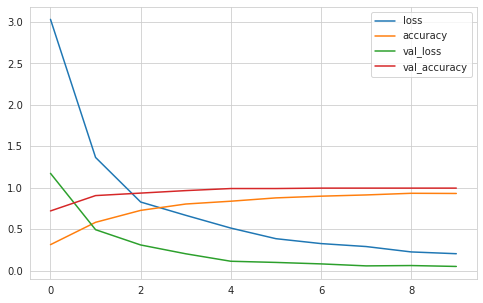

In [25]:
model.save("TSC.h5")
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [26]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: ', acc, '\nLoss    : ', loss)

7/7 [==============================] - 1s 91ms/step - loss: 0.0506 - accuracy: 0.9950
Accuracy:  0.9950000047683716 
Loss    :  0.050582073628902435


## Obtaining Predictions


In [27]:
%%time
pred = np.argmax(model.predict(X_test), axis = 1)

CPU times: user 991 ms, sys: 53.8 ms, total: 1.04 s
Wall time: 1 s


## Classification Report

In [29]:
labels = [class_labels[i] for i in range(20)]
print(classification_report(np.argmax(y_test, axis = 1), pred, target_names = labels))

                                              precision    recall  f1-score   support

                        Speed limit (20km/h)       1.00      1.00      1.00        13
                        Speed limit (30km/h)       1.00      1.00      1.00        10
                        Speed limit (50km/h)       1.00      1.00      1.00        11
                        Speed limit (60km/h)       0.90      1.00      0.95         9
                        Speed limit (70km/h)       1.00      1.00      1.00        15
                        Speed limit (80km/h)       1.00      1.00      1.00         9
                 End of speed limit (80km/h)       1.00      1.00      1.00        13
                       Speed limit (100km/h)       1.00      1.00      1.00         8
                       Speed limit (120km/h)       1.00      1.00      1.00         8
                                  No passing       1.00      1.00      1.00        13
No passing for vechiles over 3.5 metric tons       1.

## Accessing the performance of the Model

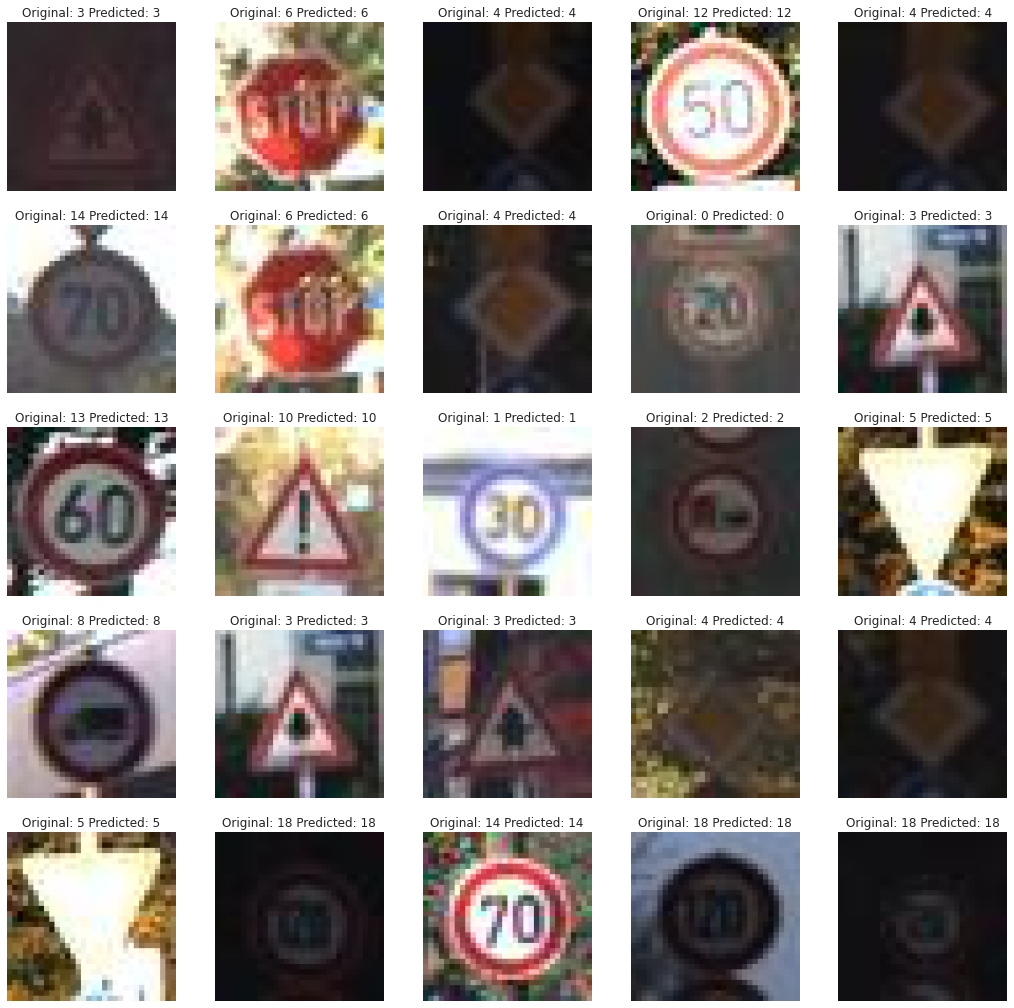

In [32]:
fig, axes = plt.subplots(5,5, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Original: {} Predicted: {}'.format(np.argmax(y_test[r]), np.argmax(model.predict(X_test[r].reshape(1, 224, 224, 3)))))

## Compiling Model with DeepC

In [33]:
!deepCC TSC.h5

[INFO]
Reading [keras model] 'TSC.h5'
[SUCCESS]
Saved 'TSC.onnx'
[INFO]
Reading [onnx model] 'TSC.onnx'
[INFO]
Model info:
  ir_vesion : 5
  doc       : 
[WARNING]
[ONNX]: graph-node block1_conv1's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block1_conv2's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block2_conv1's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block2_conv2's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block3_conv1's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block3_conv2's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block3_conv3's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block4_conv1's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block4_conv2's attribute auto_pad has no meaningful data.
[WARNING]
[ONNX]: graph-node block4_conv3's attribute auto_pad 